# Визуализация данных

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой matplotlib, seaborn и визуализациями в pandas
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Как нужно строить графики:
1. Если график стандартный используйте matplotlib напрямую из pandas 
2. Если график не стандартный используйте matplotlib
3. Если график совсем не стандартный то разделите его на несколько стандартных и используйте matplotlib
4. В каких случаях нужно использовать seaborn (если нужны профильные красивые графики, график гистограммы с распределением, японские свечи, график pairplot или heatmap, это всё тоже можно сделать в matplotlib  но это будет дольше)
5. В каких случаях стоит использовать plotly если у вас есть два часа времени чтобы построить 1 график нормального качества
6. Для чего нужен plotly, чтобы был один красивый график за который вам очень хорошо заплатят

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("seaborn")


%pylab inline

C:\Program Files\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

Давайте посмотрим на данные глазами

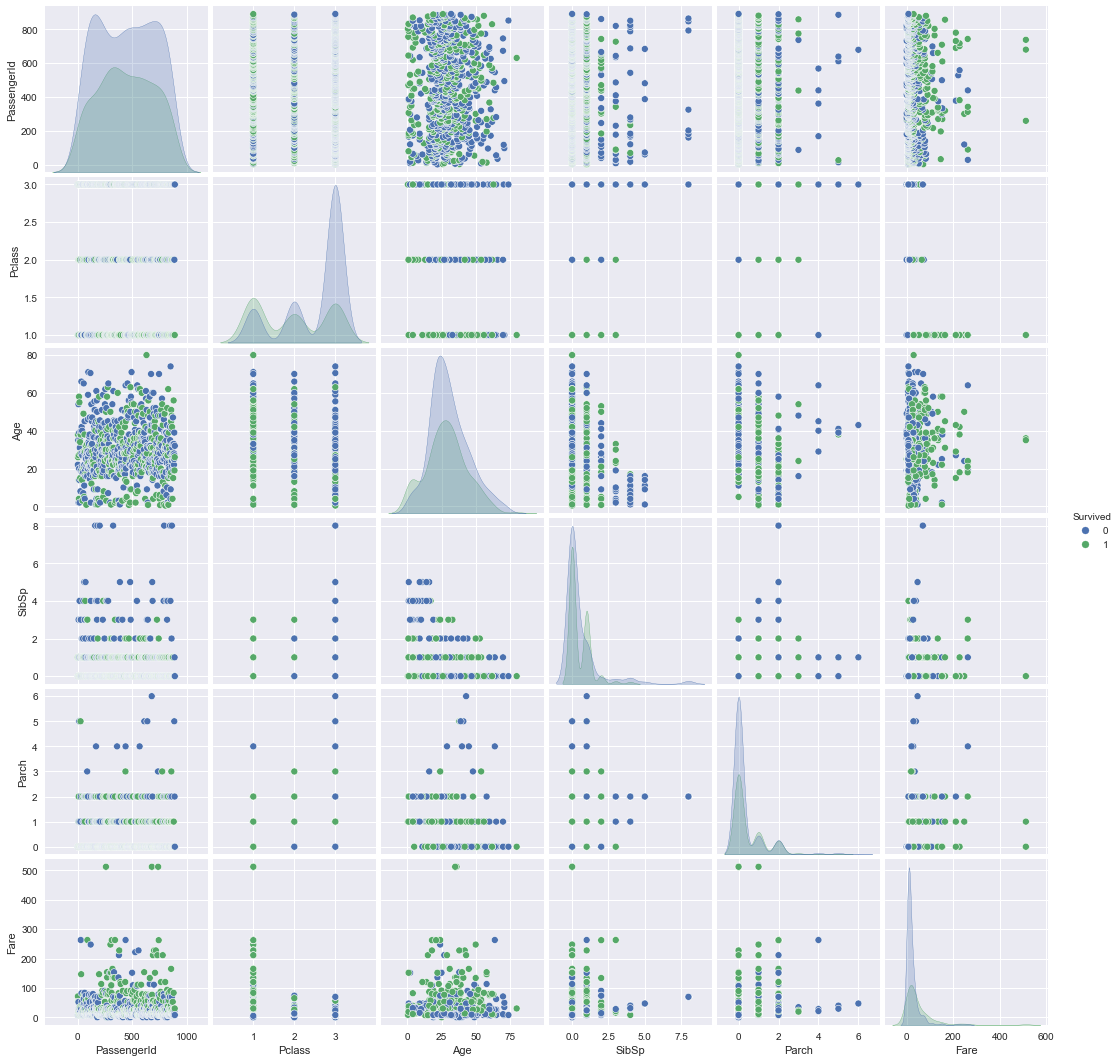

In [3]:
sns.pairplot(df, hue='Survived')

посмотрим на датасет

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Оценим долю nan

In [5]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Начинаем работу с pandas plot

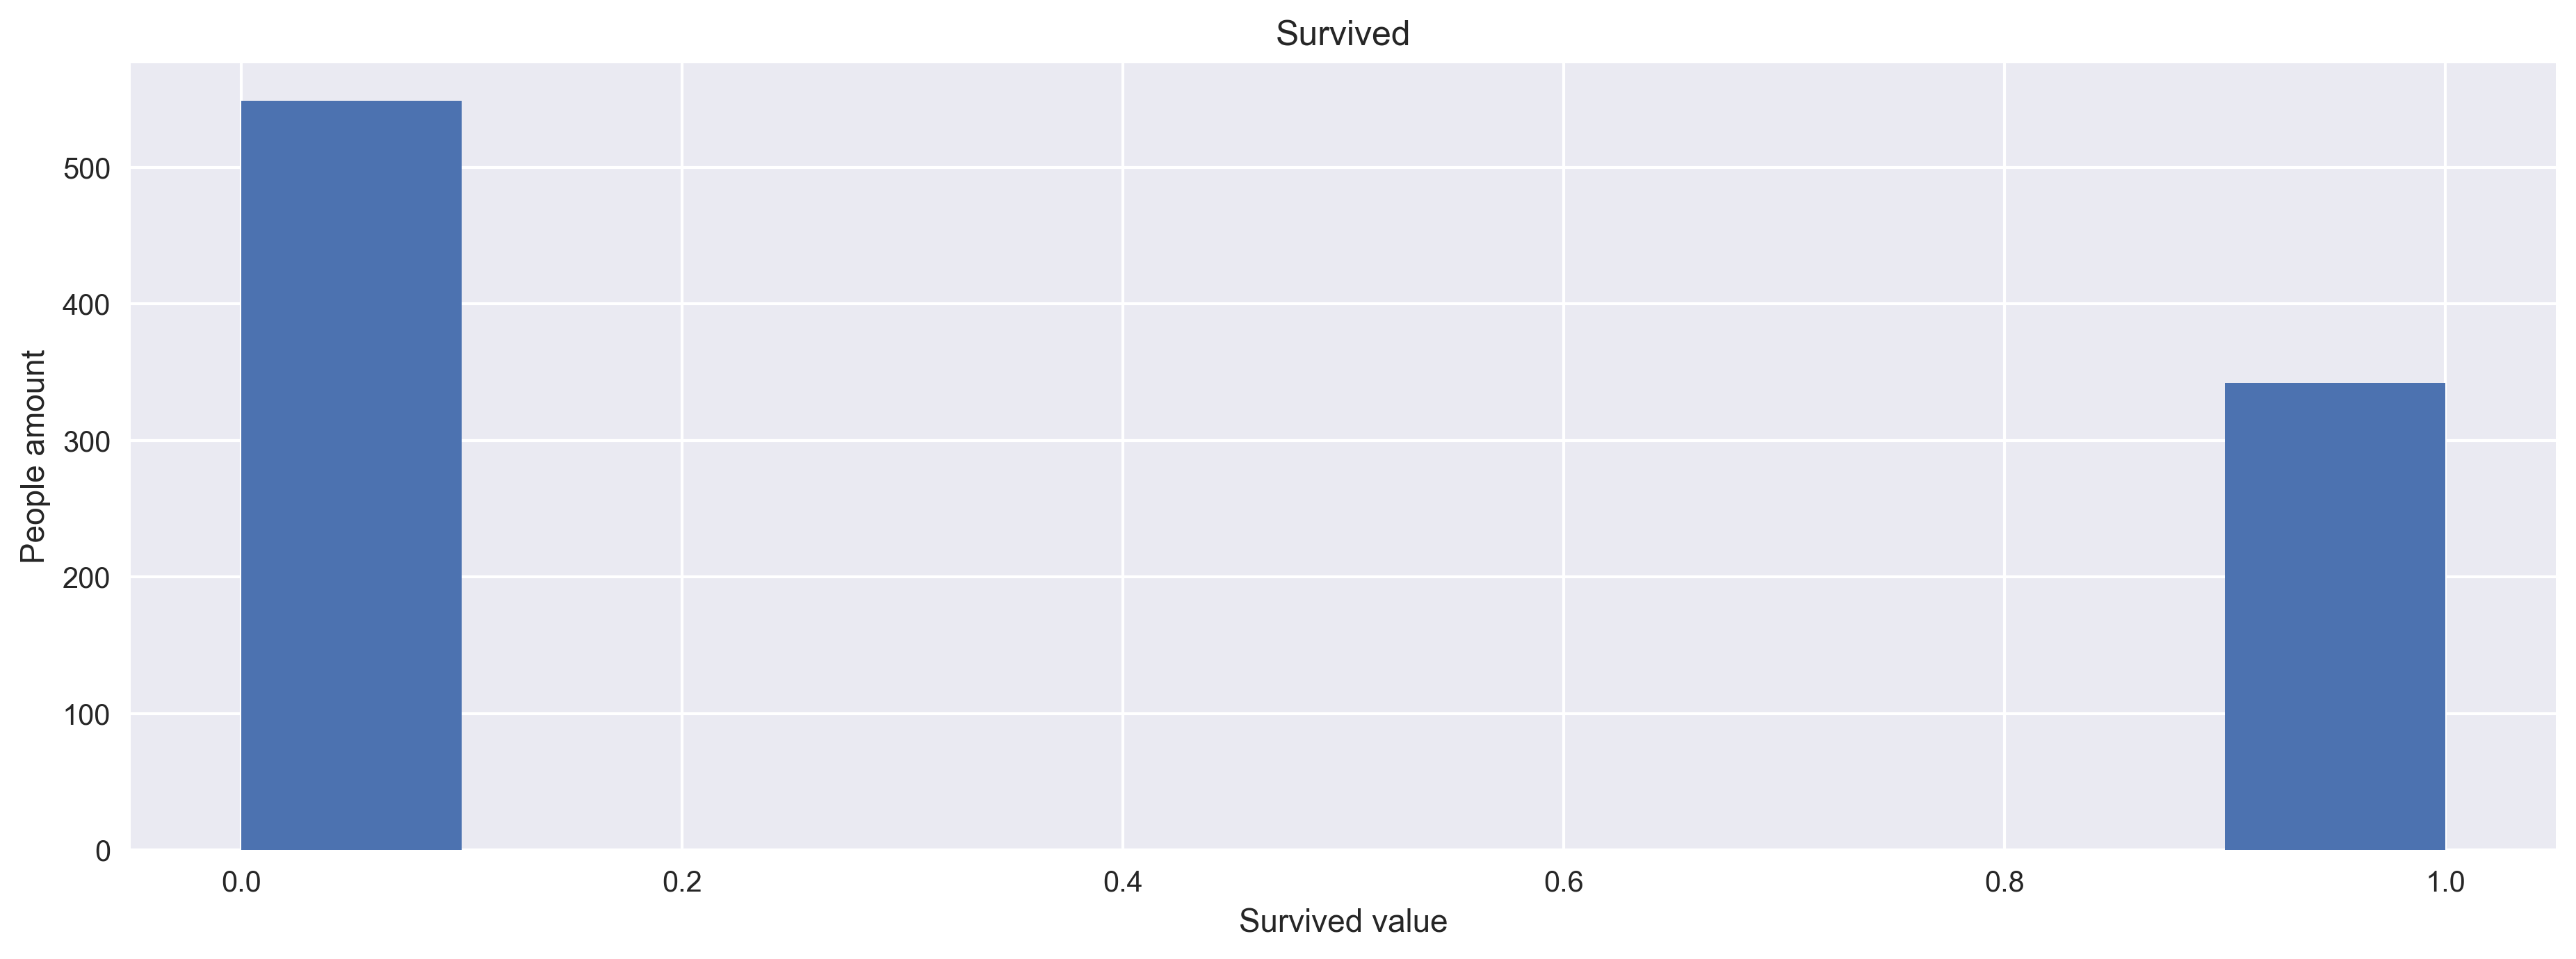

In [7]:
plt.figure(figsize=(15, 5), dpi=300)
plt.title('Survived')
plt.xlabel("Survived value")
plt.ylabel("People amount")
df['Survived'].hist();

давайте построим гистаграмму по возрасту 

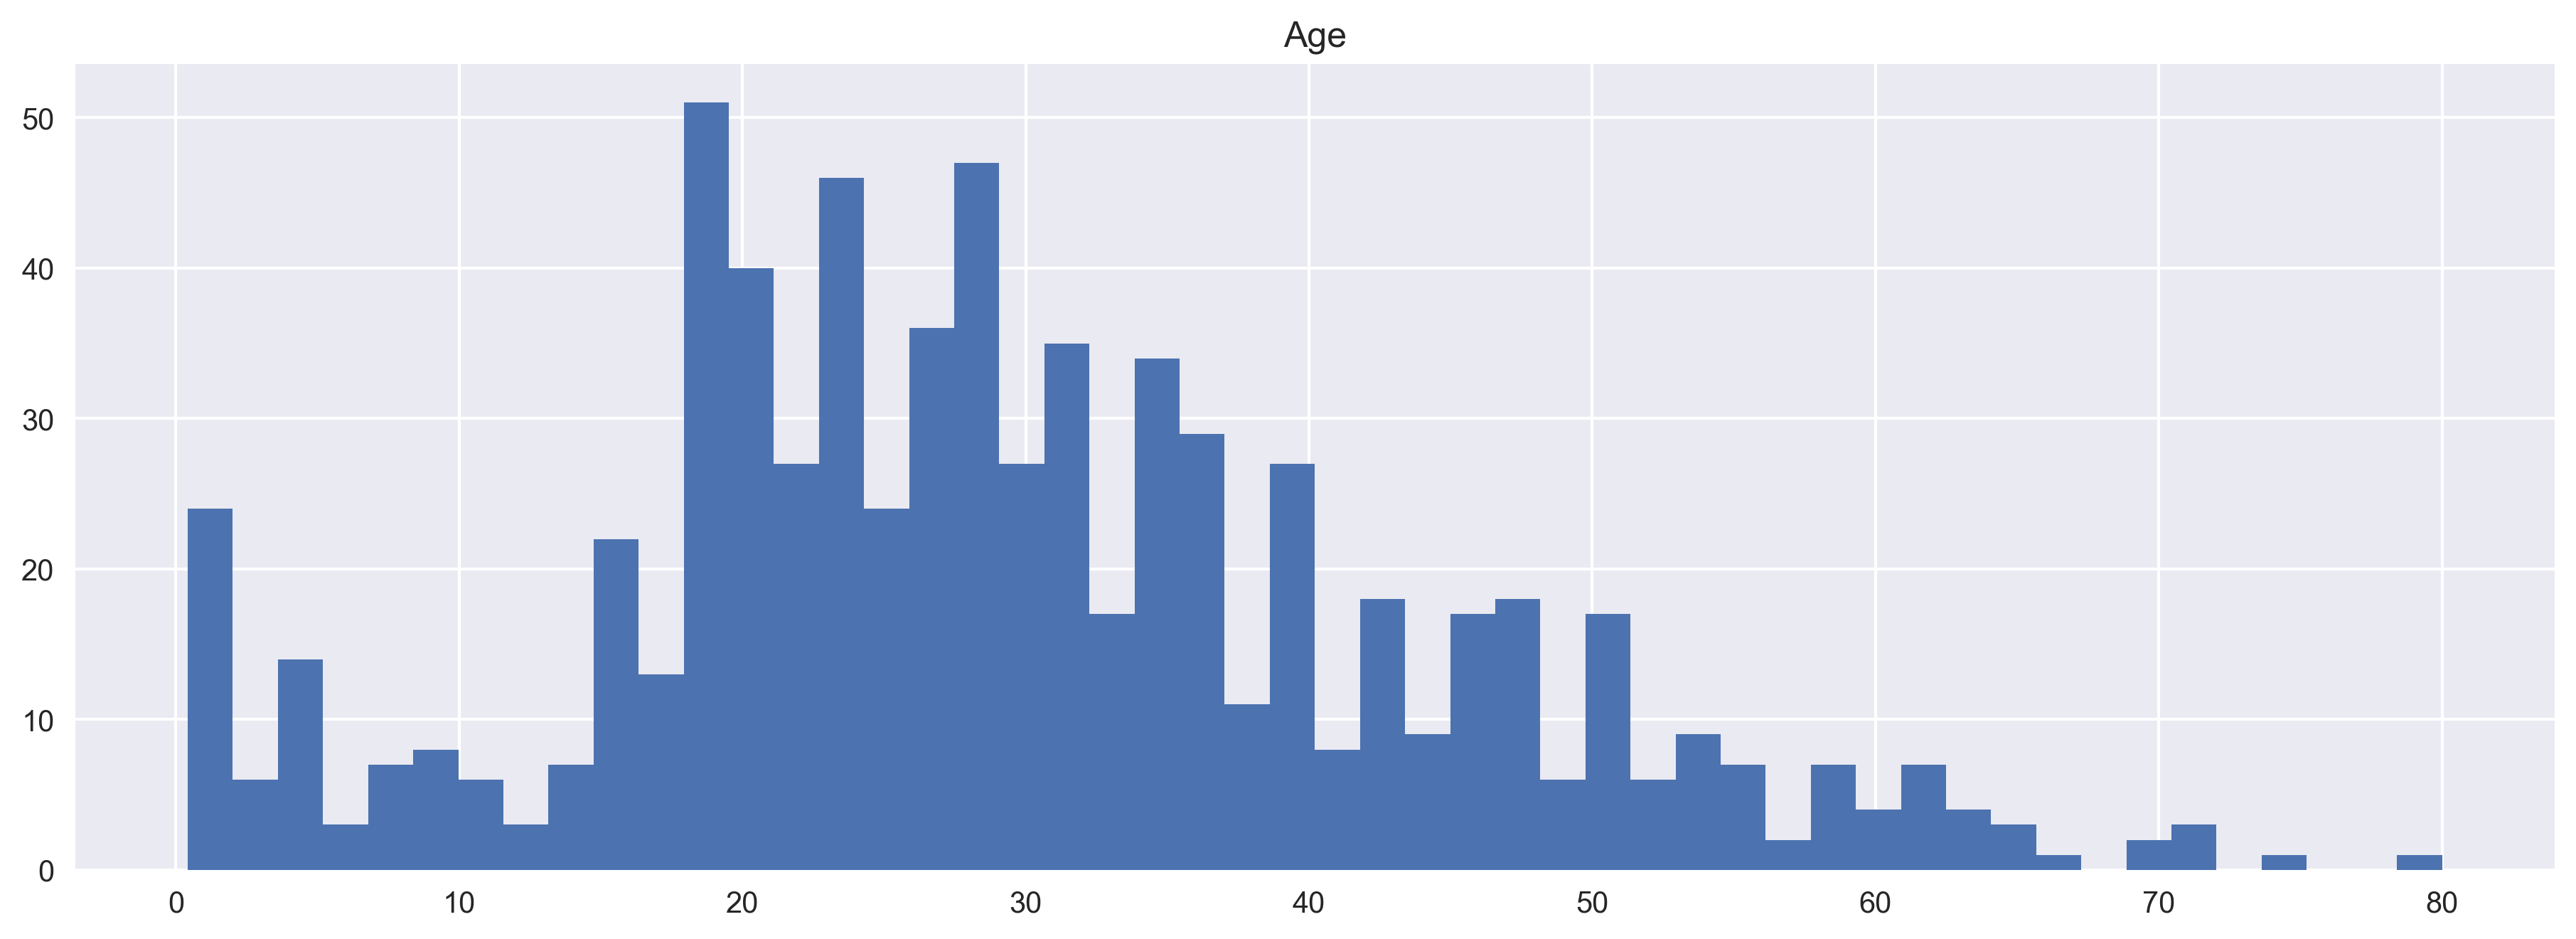

In [10]:
fig = plt.figure(figsize=(15, 5), dpi=300)
plt.title('Age')
df['Age'].hist(bins=50);

а теперь ходим добавить разделение по группам выживших и не выживших

посмотрим как сделать такой график в seaborn 

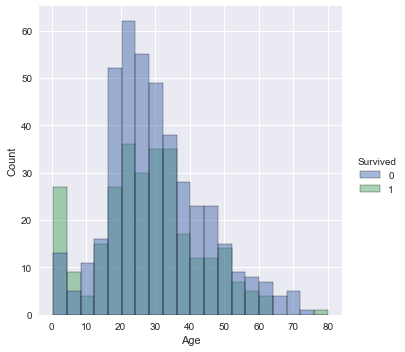

In [12]:
# plt.figure(figsize=(15, 5), dpi=300)
sns.displot(df, x='Age', hue='Survived');

а теперь посмотрим как сделать такой график в matplotlib 

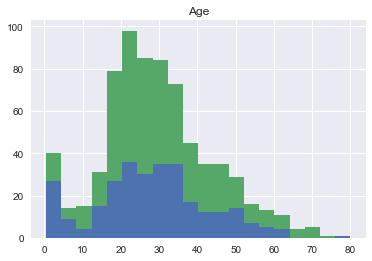

In [13]:
plt.title('Age')
plt.hist([df['Age'][df['Survived']==1], df['Age'][df['Survived']==0]], stacked=True,  bins=20);

Давайте оценим корреляция между столбцами признаков 

In [14]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


а теперь сделаем её чуть лучше читаемой

<AxesSubplot:>

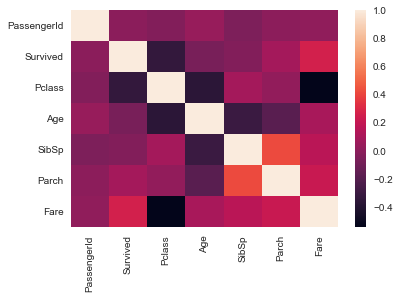

In [15]:
sns.heatmap(df.corr())

и ещё чуть лучше

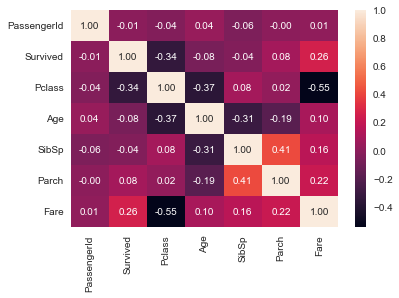

In [17]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f');


неповторимый идеал

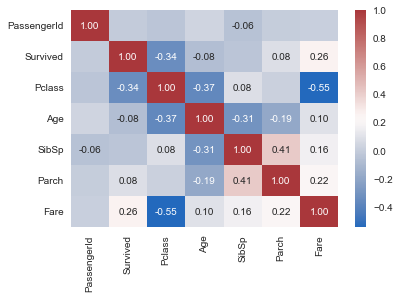

In [19]:
ax = sns.heatmap(df.corr(), cmap='vlag', annot=True, fmt='0.2f')
for t in ax.texts:
    if float(t.get_text())>=0.05 or float(t.get_text())<=-0.05:
        t.set_text(t.get_text()) 
    else:
        t.set_text("")

bar plot

<AxesSubplot:ylabel='Pclass'>

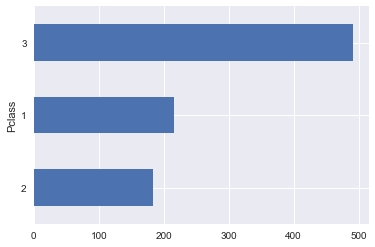

In [20]:
df.groupby('Pclass')['Name'].nunique().sort_values().plot(kind='barh')

scatter plot

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


как scatter  строить не нужно

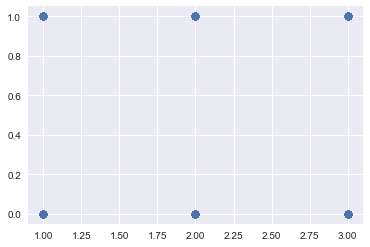

In [22]:
plt.scatter(df['Pclass'], df['Survived']);

как scatter строить нужно

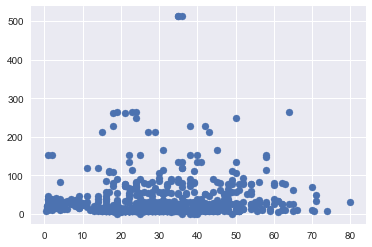

In [23]:
plt.scatter(df['Age'], df['Fare']);

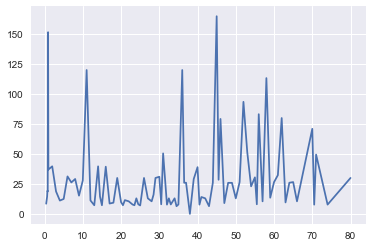

In [38]:
import itertools
import math
AgeToFare = {}
for i, j in zip(df['Age'], df['Fare']):
  if not math.isnan(i):
    AgeToFare[i] = j
sorted_fare = []
sorted_age = []
for i in sort(df['Age']):
  if not math.isnan(i):
    sorted_age.append(i)
    sorted_fare.append(AgeToFare[i])
plt.plot(sorted_age, sorted_fare)
plt.plot(sorted_age, sorted_survival)
plt.show()

суперпозиция графиков 

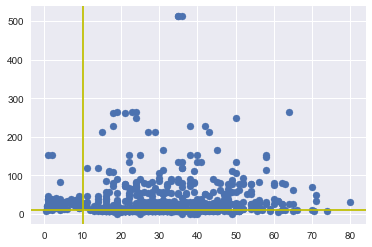

In [24]:
plt.scatter(df['Age'], df['Fare']);
plt.axhline(10, c='y');
plt.axvline(10, c='y');

subplots

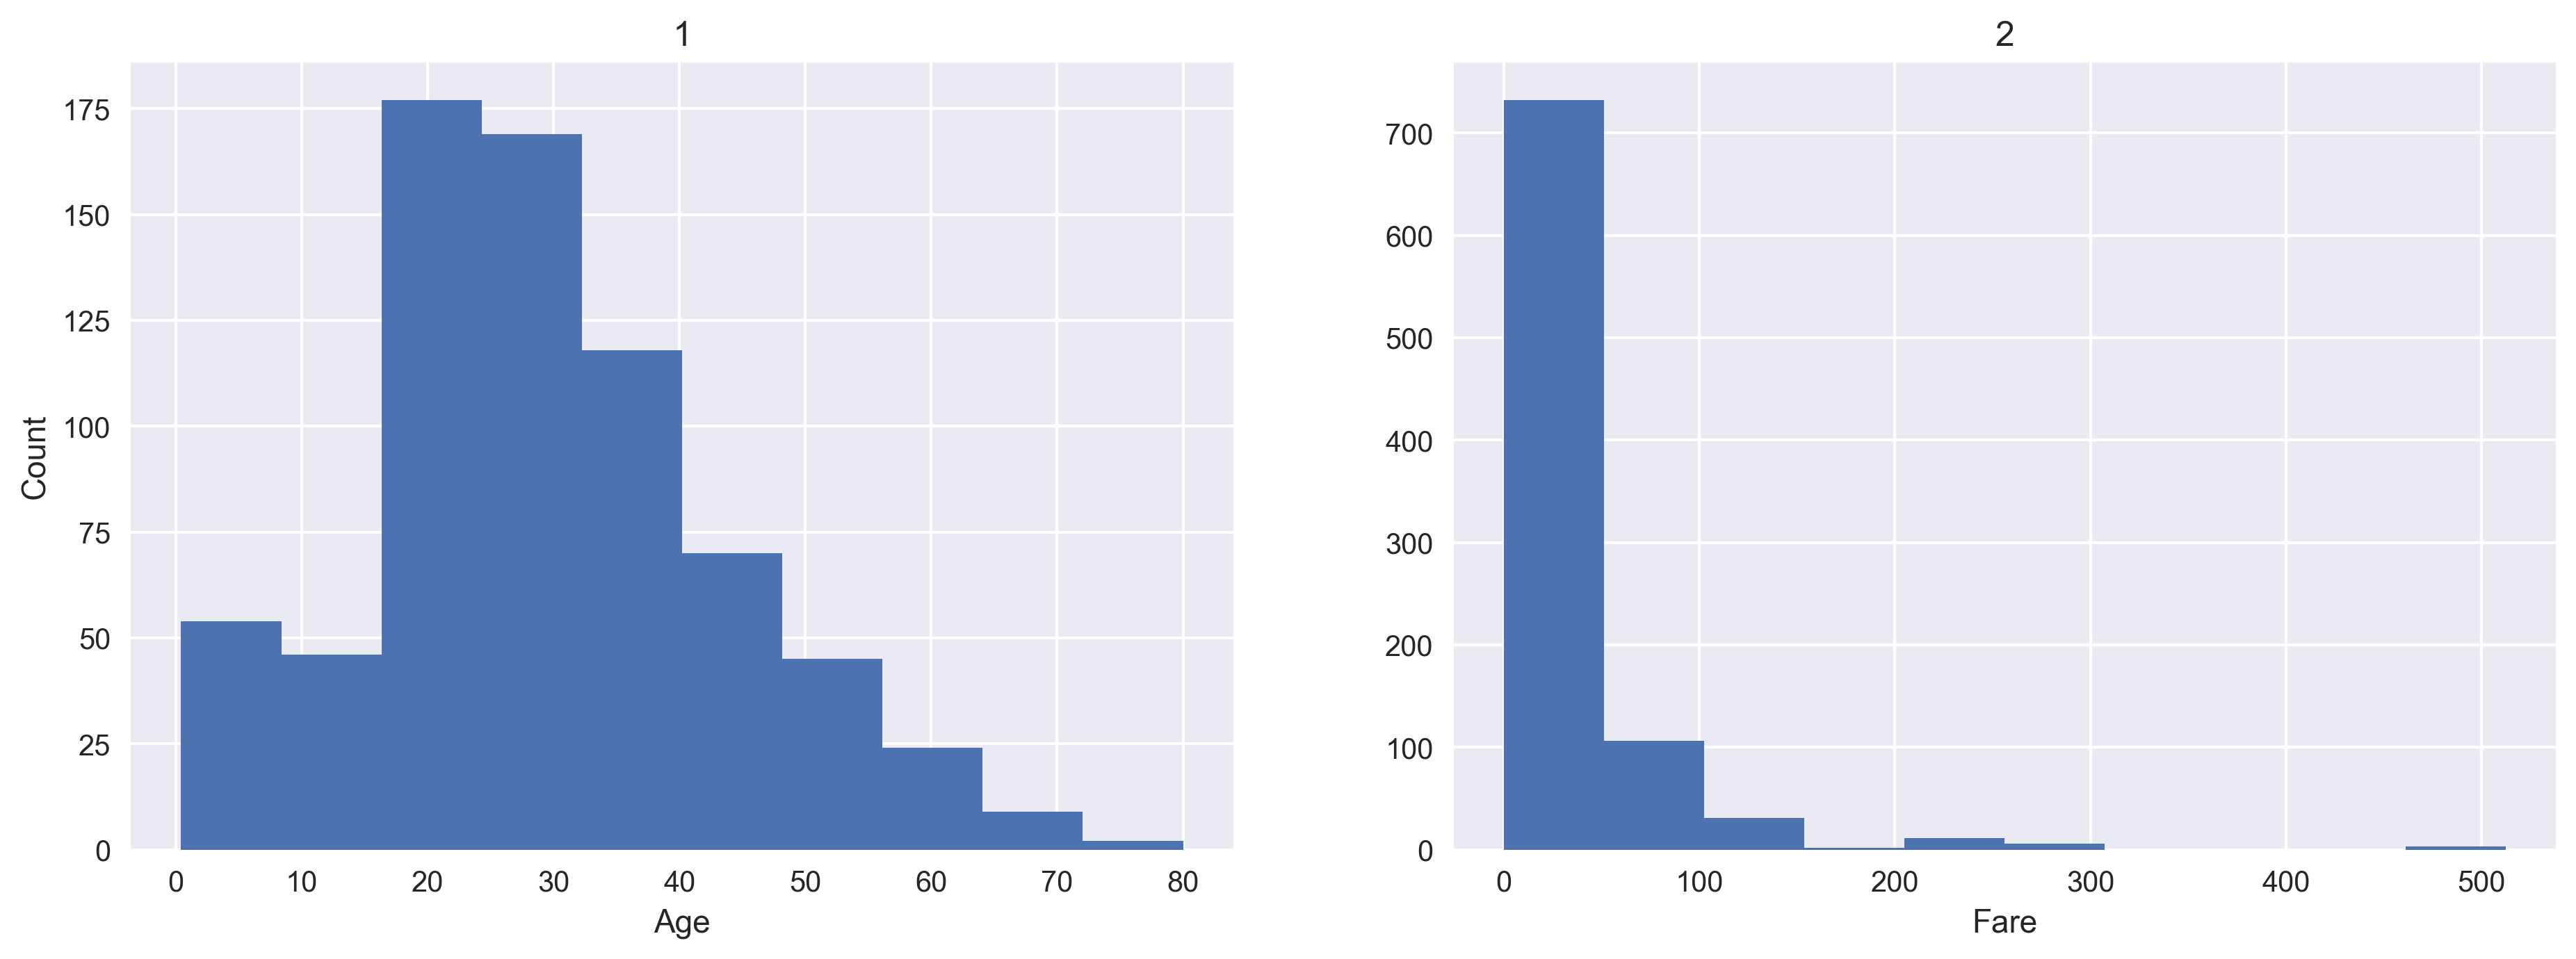

In [25]:
plt.figure(figsize=(15, 5), dpi=300)
plt.subplot(1, 2, 1)
plt.title('1')
plt.hist(df['Age'])
plt.ylabel('Count')
plt.xlabel('Age')
plt.subplot(1, 2, 2)
plt.title('2')
plt.hist(df['Fare'])
plt.xlabel('Fare')
plt.show()

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [ ]:
#your code here

In [ ]:
Data.head()

Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [ ]:
#your code here

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [ ]:
#your code here

**Задание ***. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [ ]:
#your code here

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [ ]:
#your code here

Data.head()

Посмотрим, как влияет пол на выживаемость.

In [ ]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

In [ ]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

In [ ]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [ ]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [ ]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [ ]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [ ]:
#your code here

Заполним пропуски медианным значением Age.

In [ ]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

In [ ]:
sns.distplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

In [ ]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [ ]:
#your code here

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [ ]:
Data['Pclass'].value_counts()

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

In [ ]:
#your code here

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [ ]:
Data['SibSp'].value_counts()

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [ ]:
Data['Parch'].value_counts()

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [ ]:
#your code here

In [ ]:
Data.head()

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [ ]:
#your code here
NumericData = ...

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

In [ ]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [ ]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [ ]:
#your code here

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [ ]:
#Your code here

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [ ]:
#your code here

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

# Бонус.

**Задание 16*.** Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности. 

b) Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным.

In [ ]:
def prediction(x):
    # x - один объект
    ...

In [ ]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

**Задание 17.***

Разобъем данные на тренировочную и тестовую часть с помощью train_test_split.

2) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов.

3) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качество.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = Data['Survived']
X = Data._get_numeric_data().drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#your code here